<center><h1>Reddit Data Analysis(EDA)-v1</h1></center>
<hr>

## What is about..

Explore the Reddit Dataset.

## Thanks to.. <a id="top"></a>

> **Kaggle Data**<br>
> 
> [Reddit - Data is Beautiful](https://www.kaggle.com/unanimad/dataisbeautiful)<br>

> **Questions**<br>
> 
> [tqdm: Using progress bar in pandas apply function](https://stackoverflow.com/questions/18603270/progress-indicator-during-pandas-operations)<br>
> [nltk: pos_tag + lemmatiza](https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python)<br>
> [wordcloud: how to draw wordcloud](https://lovit.github.io/nlp/2018/04/17/word_cloud/)<br>
> [sci-kit learn: count vectorizer get feature name](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)<br>

## Table of Contents.. <a id="top"></a>

1. [Problem Description](#1)
2. [Data Description](#2)
3. [Environment Setting](#3)
    1. [Import Library](#3.1)
    2. [Load Dataset](#3.2)
4. [Data Preprocessing](#4)
    1. [Missing Value](#4.1)
    2. [Time Management](#4.2)
    3. [OC(Original Content)](#4.3)
    4. [Text Cleaning](#4.4)
5. [Exploratory Data Analysis(EDA)](#5)
    1. [Distribution of Numerical Value](#5.1)
    2. [Time Analysis](#5.2)
    3. [Wordcloud Text Analysis](#5.3)
6. [Word Embedding](#6)
    1. [Count Vectorizer](#6.1)
    2. [TF-IDF Vectorizer](#6.2)
7. [Data Modeling](#7)
    1. [Dimension Reduction](#7.1)
    2. [Classification](#7.2)
    3. [Topic Modeling](#7.3)

<hr>

# 1. Problem Description <a id="1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

Using Reddit Dataset, do Exploratory Data Analysis. Question and Validation using Data Visualization.

# 2. Data Description <a id="2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

Reddit Data is Beautiful - from [Kaggle](https://www.kaggle.com/unanimad/dataisbeautiful)
> **About**<br>
> 
> Data is Beautiful, r/dataisbeautiful, is a place for visual representations of data: Graphs, charts, maps, etc. DataIsBeautiful is for visualizations that effectively convey information. Aesthetics are an important part of information visualization, but pretty pictures are not the aim of this subreddit.

> **Content**<br>
> 
> This dataset contains a couple of fields with the information based on Reddit post submission, such:
> Fields:
> * id
> * title
> * score
> * author
> * authorfalirtext
> * removed_by
> * totalawardsreceived
> * awarders
> * created_utc
> * full_link
> * num_commnets
> * over_18

> **Method**<br>
> 
> The data was extracted using the PushShift API for Reddit. Thanks Watchful1 for show me this API.

# 3. Environment Setting<a id="3"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 3.1. Import Library<a id="3.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [1]:
# Image
from PIL import Image

# Python Collectino
from collections import Counter

# FOR Loop Verbose
from tqdm import tqdm

# System
import os

# String
import string

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

# Date and Time
import datetime

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Numerical Data
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
current_dir = os.getcwd() 
data_path = os.path.join(current_dir, 'data', 'nltk_data')
print(data_path)
if not os.path.exists(data_path):
    nltk.download()
nltk.data.path.append(data_path)

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Reddit Data is Beautiful/data/nltk_data


In [3]:
pd.options.display.max_rows = 499
pd.options.display.max_columns = 499
pd.options.mode.chained_assignment = None

In [4]:
%matplotlib inline

## 3.2. Load Dataset<a id="3.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [5]:
raw = pd.read_csv('./data/r_dataisbeautiful_posts.csv', encoding='utf-8')
raw

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,NaN,NaN,0.0,[],1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,NaN,NaN,0.0,[],1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,OC: 2,NaN,0.0,[],1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,NaN,NaN,0.0,[],1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,gg08xz,Web Scraping with Python,1,yakult2450,NaN,NaN,0.0,[],1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,NaN,NaN,NaN,NaN,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,NaN,NaN,NaN,NaN,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178309,pq922,Wavii.,13,ddshroom,NaN,NaN,NaN,NaN,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,NaN,NaN,NaN,NaN,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178312 entries, 0 to 178311
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     178312 non-null  object 
 1   title                  178311 non-null  object 
 2   score                  178312 non-null  int64  
 3   author                 178312 non-null  object 
 4   author_flair_text      23223 non-null   object 
 5   removed_by             8895 non-null    object 
 6   total_awards_received  38306 non-null   float64
 7   awarders               27631 non-null   object 
 8   created_utc            178312 non-null  int64  
 9   full_link              178312 non-null  object 
 10  num_comments           178312 non-null  int64  
 11  over_18                178312 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 15.1+ MB


In [7]:
raw.describe(include='all')

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
count,178312,178311,178312.000000,178312,23223,8895,38306.000000,27631,1.783120e+05,178312,178312.000000,178312
unique,178312,165048,NaN,76829,184,5,NaN,2,NaN,178312,NaN,2
top,6ny8s4,data_irl,NaN,[deleted],OC: 1,moderator,NaN,[],NaN,https://www.reddit.com/r/dataisbeautiful/comme...,NaN,False
freq,1,1060,NaN,27914,7706,6256,NaN,27630,NaN,1,NaN,177394
mean,NaN,NaN,190.231729,NaN,NaN,NaN,0.002193,NaN,1.494084e+09,NaN,25.233462,NaN
std,NaN,NaN,1985.573519,NaN,NaN,NaN,0.095290,NaN,6.248934e+07,NaN,195.243672,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,1.329263e+09,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,1.446637e+09,NaN,1.000000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,1.493295e+09,NaN,1.000000,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,0.000000,NaN,1.550178e+09,NaN,4.000000,NaN


In [8]:
raw.isna().sum()

id                            0
title                         1
score                         0
author                        0
author_flair_text        155089
removed_by               169417
total_awards_received    140006
awarders                 150681
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

# 4. Data Preprocessing<a id="4"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 4.1. Missing Value<a id="4.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [9]:
cleaned = raw.copy()

**title**<br>
impute title to 'null'

In [10]:
cleaned.title = cleaned.title.fillna('null')

In [11]:
cleaned[cleaned.title == 'null']

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
92417,62nr1e,null,0,turn-down-for-what,NaN,NaN,NaN,NaN,1490990982,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


**author_flair_text, removed_by, total_awards_received, awarders**<br>
drop

In [12]:
columns = ['author_flair_text', 'removed_by', 'total_awards_received', 'awarders']
cleaned = cleaned.drop(columns, axis=1)
cleaned

,id,title,score,author,created_utc,full_link,num_comments,over_18
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


In [13]:
cleaned.isna().sum()

id              0
title           0
score           0
author          0
created_utc     0
full_link       0
num_comments    0
over_18         0
dtype: int64

## 4.2. Time Management<a id="4.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [14]:
def utc_to_datetime(data):
    data['year'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).year)
    data['month'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).month)
    data['day'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).day)    
    data['hour'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).hour)
    data['minute'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).minute)
    data['second'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).second)    

In [15]:
utc_to_datetime(cleaned)
cleaned

,id,title,score,author,created_utc,full_link,num_comments,over_18,year,month,day,hour,minute,second
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,6,11
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,1,43
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,0,45
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,57,40
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,14,9
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,2,40
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False,2012,2,15,13,22,57
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,9,20,3


## 4.3. OC(Original Content)<a id="4.3"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [16]:
cleaned['original_content'] = cleaned['title'].str.contains('[OC]').astype(int)
cleaned

,id,title,score,author,created_utc,full_link,num_comments,over_18,year,month,day,hour,minute,second,original_content
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,6,11,1
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,1,43,1
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,0,45,1
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,57,40,1
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,52,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,14,9,0
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,2,40,0
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False,2012,2,15,13,22,57,0
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,9,20,3,1


## 4.4. Text Cleaning<a id="4.4"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [17]:
def get_wordnet_tag(tag):
    if tag == 'ADJ':
        return 'j'
    elif tag == 'VERB':
        return 'v'
    elif tag == 'NOUN':
        return 'n'
    elif tag == 'ADV':
        return 'r'
    else:
        return 'n'

In [18]:
def lemmatize_text(title):
    stop = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()

    words = list()
    title = word_tokenize(title)
    for word, tag in pos_tag(title):
        tag = get_wordnet_tag(tag)
        word = lemmatizer.lemmatize(word, tag)
        if word not in stop:
            words.append(word)
    
    return ' '.join(words)        

In [19]:
def clean_text(dataset):
    
    tqdm.pandas()
    
    dataset['title_cleaned'] = dataset['title'].str.lower()
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r'\[oc\]', ' ')
    pattern_link = r'https?://[^\s]+|www\.[^\s]+|[^\s]+\.com[^\s]*|[^\s]+\.org[^\s]*|[^\s]+\.html[^\s]*'
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(pattern_link, ' link ')
    
    pattern_punctuation = r'[' + string.punctuation + '’]'
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(pattern_punctuation, '')
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r' [\d]+ |^[\d]+ | [\d]+$', ' ')
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r'[^\w\d\s]+', ' ')
    dataset['title_cleaned'] = dataset['title_cleaned'].progress_apply(lambda title: lemmatize_text(title))
    
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r'\s[\s]+', ' ')

In [20]:
clean_text(cleaned)
cleaned

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 178312/178312 [03:01<00:00, 981.95it/s] 


,id,title,score,author,created_utc,full_link,num_comments,over_18,year,month,day,hour,minute,second,original_content,title_cleaned
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,6,11,1,3d visualization covid19 evolution city brazil...
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,1,43,1,household oil consumption price since july
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,0,45,1,popular state people leaving new york
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,57,40,1,several animated climate map showing year wort...
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,52,3,0,web scraping python
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,14,9,0,infosthetics seems like belongs
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,2,40,0,time lapse every nuclear detonation
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False,2012,2,15,13,22,57,0,wavii
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,9,20,3,1,interactive representation pres obamas budget ...


## 4.5. Data Type Conversion<a id="4.5"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [21]:
cleaned['over_18'] = cleaned['over_18'].apply(lambda x: int(x))
cleaned

,id,title,score,author,created_utc,full_link,num_comments,over_18,year,month,day,hour,minute,second,original_content,title_cleaned
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,5,6,11,1,3d visualization covid19 evolution city brazil...
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,5,1,43,1,household oil consumption price since july
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,5,0,45,1,popular state people leaving new york
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,4,57,40,1,several animated climate map showing year wort...
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,4,52,3,0,web scraping python
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2012,2,15,14,14,9,0,infosthetics seems like belongs
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2012,2,15,14,2,40,0,time lapse every nuclear detonation
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,0,2012,2,15,13,22,57,0,wavii
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2012,2,15,9,20,3,1,interactive representation pres obamas budget ...


# 5. Exploratory Data Analysis(EDA)<a id="5"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 5.1. Distribution of Numerical Value<a id="5.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [22]:
def boxplot(data, feature, base):
    assert base in ['over_18', 'original_content']
    
    plt.figure(figsize=(30, 12))
    sns.boxplot(x=base, y=feature, data=data)
    plt.show()

In [23]:
cleaned['score'].value_counts()

1        97705
0        15893
2         8577
3         5676
4         3838
         ...  
17604        1
3149         1
1100         1
7119         1
3391         1
Name: score, Length: 3961, dtype: int64

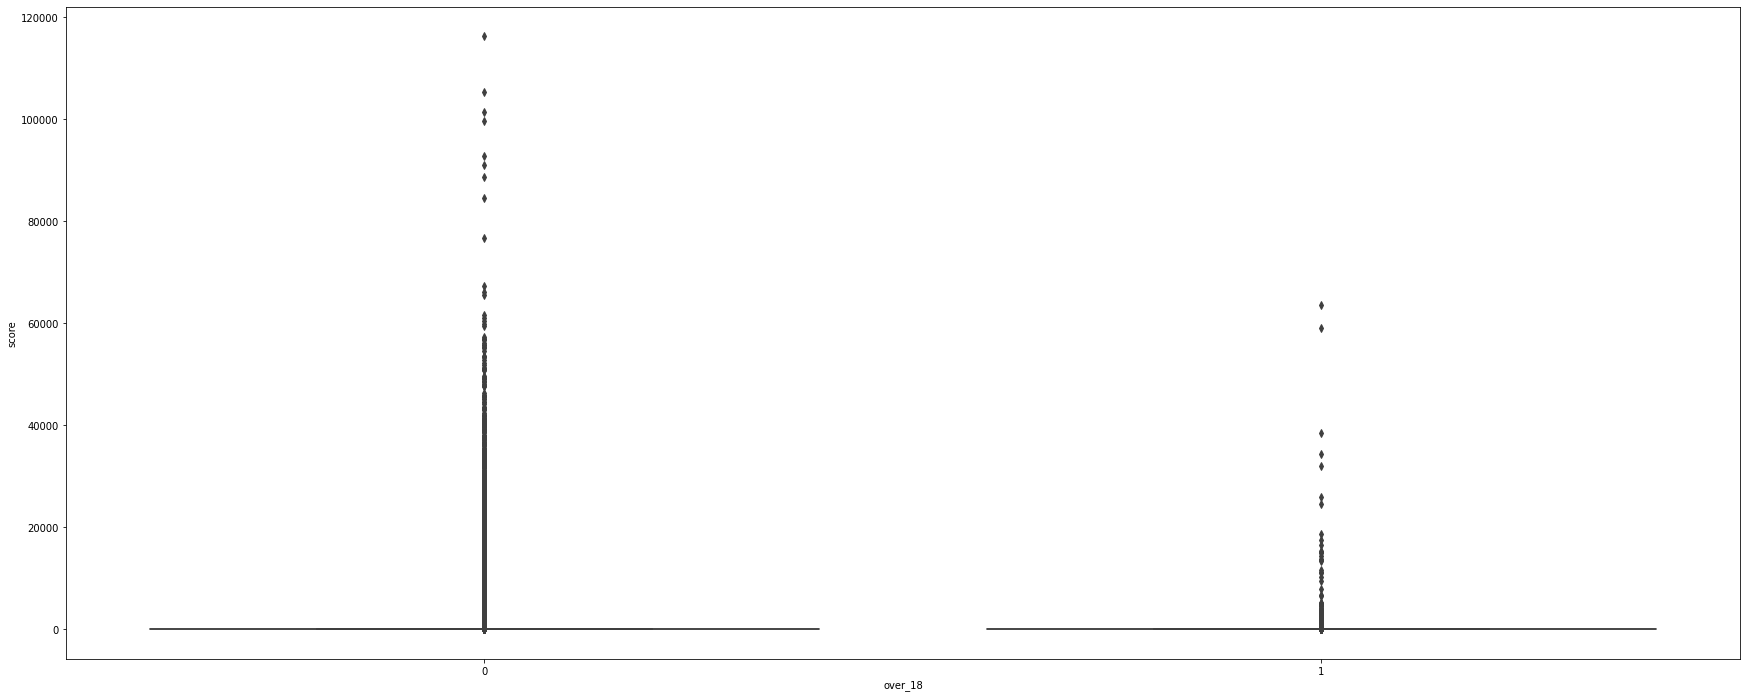

In [24]:
boxplot(cleaned, 'score', 'over_18')

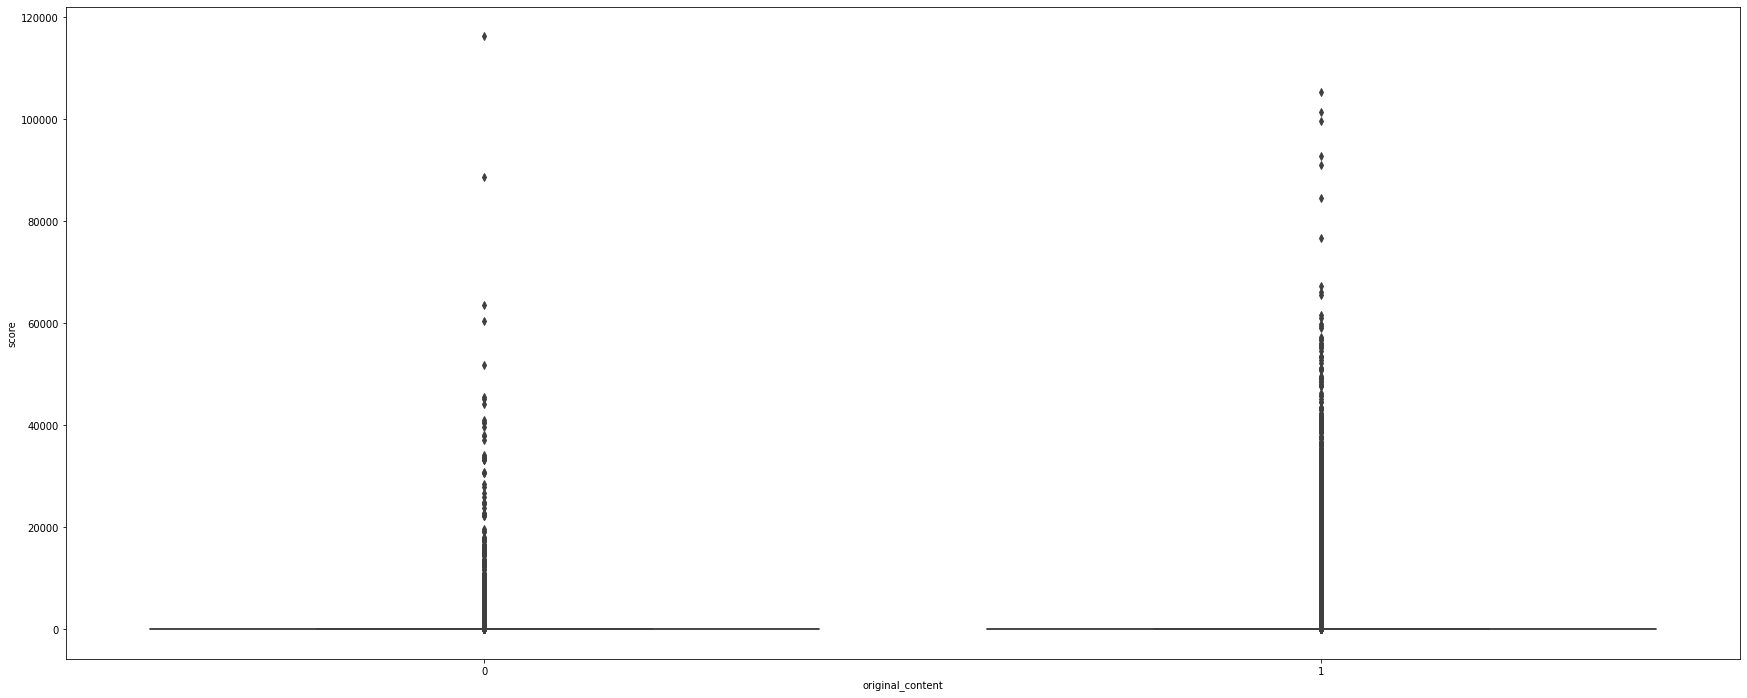

In [25]:
boxplot(cleaned, 'score', 'original_content')

In [26]:
cleaned['num_comments'].value_counts()

1       51883
0       41153
2       24845
3       10455
4        7653
        ...  
2412        1
1591        1
1463        1
1207        1
1535        1
Name: num_comments, Length: 1776, dtype: int64

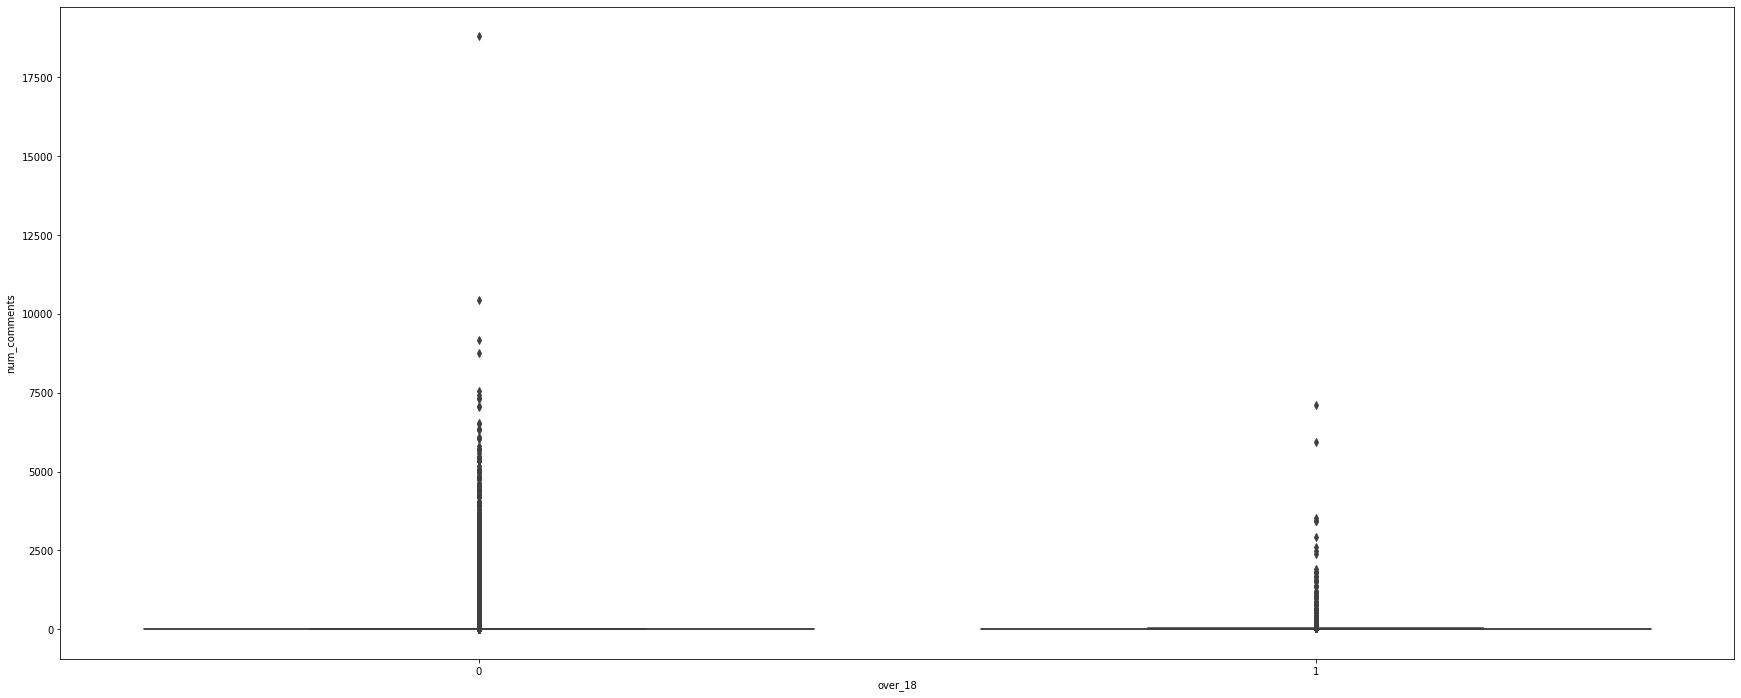

In [27]:
boxplot(cleaned, 'num_comments', 'over_18')

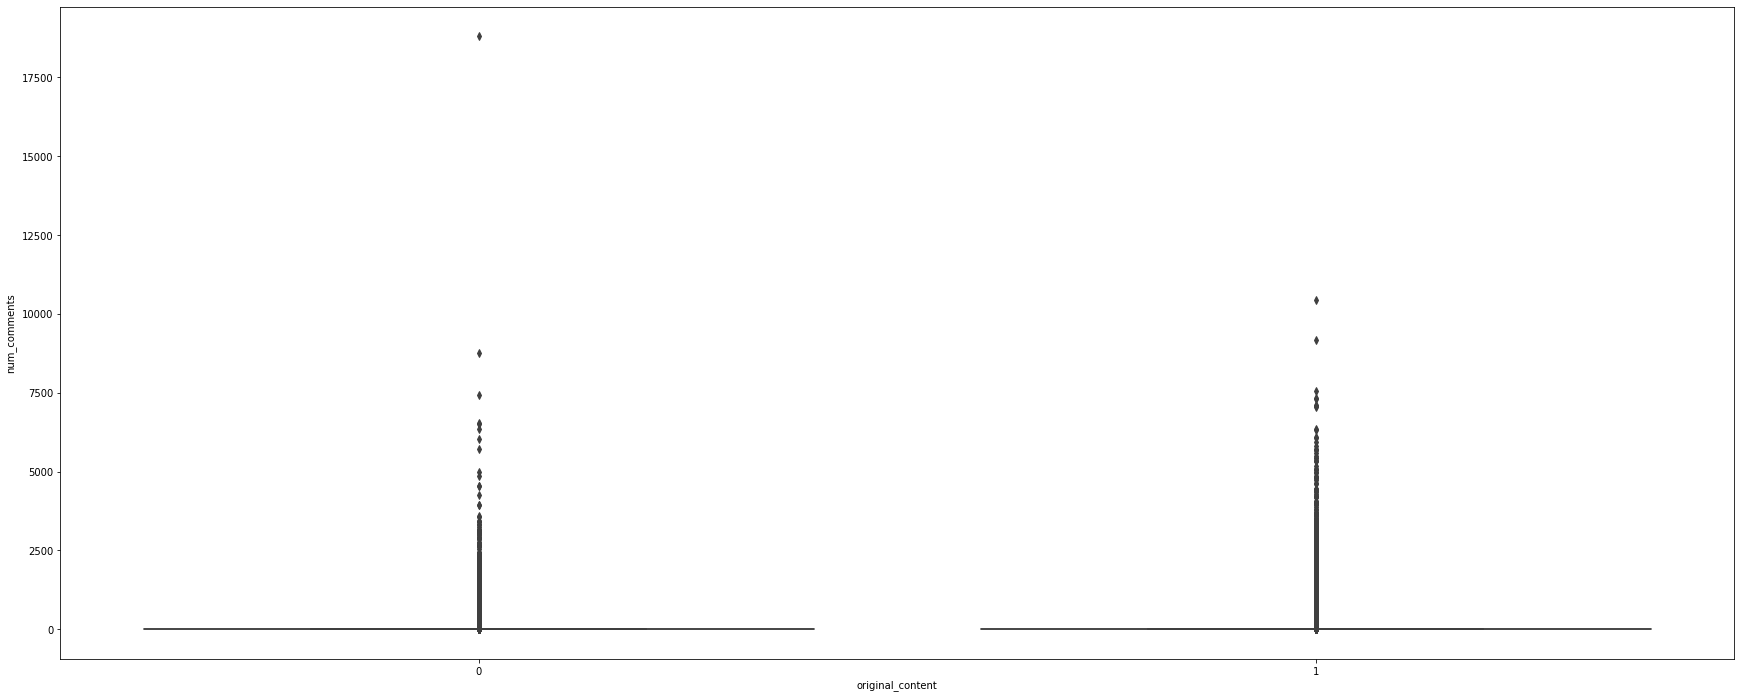

In [28]:
boxplot(cleaned, 'num_comments', 'original_content')

## 5.2. Time Analysis<a id="5.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [29]:
def countplot(data, by='year'):
    assert by in ['year', 'month', 'day']
    data_copy = data.copy()
    data_copy['year'] = data_copy['year'].astype(str)
    data_copy['month'] = data_copy['month'].astype(str)
    data_copy['day'] = data_copy['day'].astype(str)

    plt.figure(figsize=(30, 10))
    if by == 'year':
        stat = data_copy['year'].value_counts()        
        sns.countplot(by, data=data_copy)
        plt.xlabel(by)
    elif by == 'month':
        data_copy['month'] = data_copy['year'] + '/' + data_copy['month']
        stat = data_copy['month'].value_counts()        
        sns.countplot(by, data=data_copy)
        plt.xlabel(by)
        plt.xticks(rotation=45)
    elif by == 'day':
        data_copy['day'] = data_copy['year'] + '/' + data_copy['month'] + '/' + data_copy['day']
        stat = data_copy['day'].value_counts()        
        sns.countplot(by, data=data_copy)            
        
    plt.ylabel('count')
    plt.title('Count by Year/Month/Day Recent to Old')
    plt.show()
    
    return stat
    

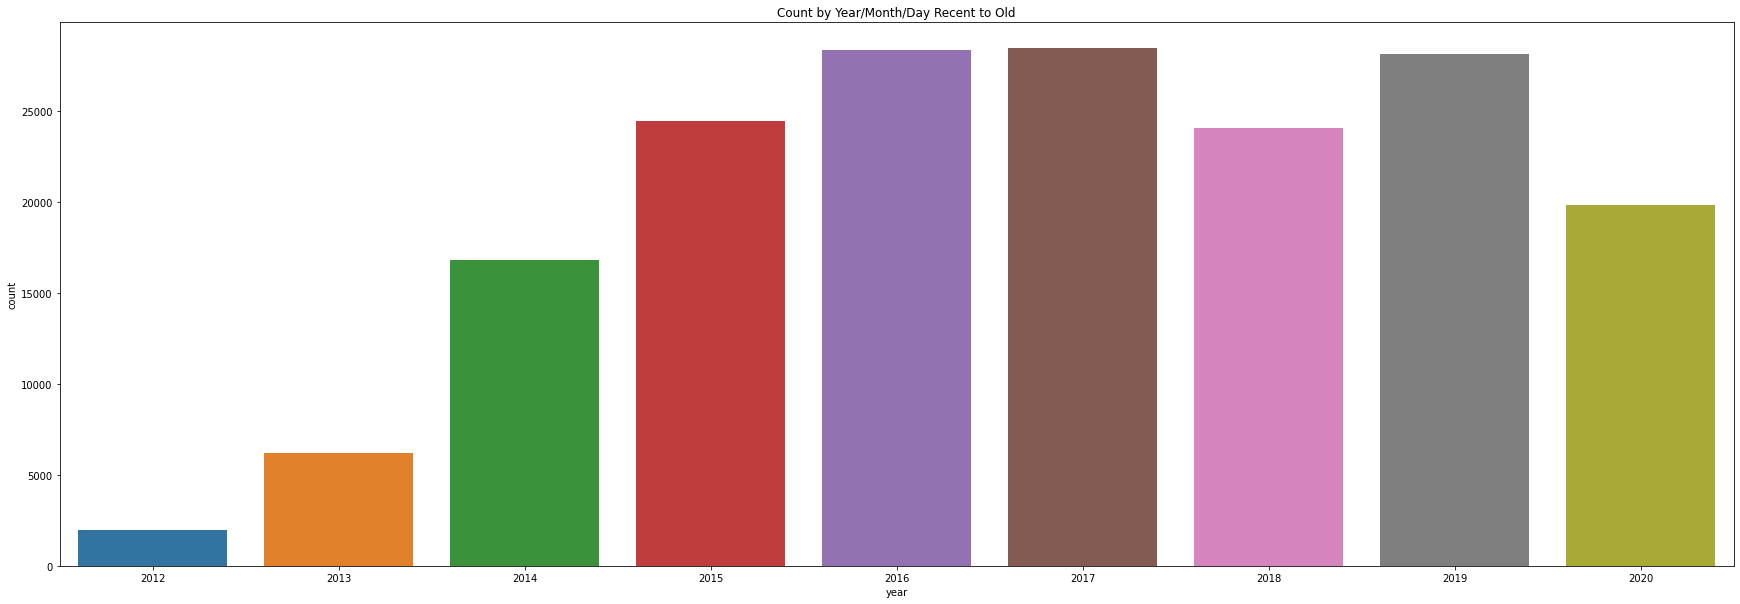

2017    28462
2016    28348
2019    28164
2015    24471
2018    24044
2020    19835
2014    16837
2013     6190
2012     1961
Name: year, dtype: int64

In [30]:
countplot(cleaned, 'year')

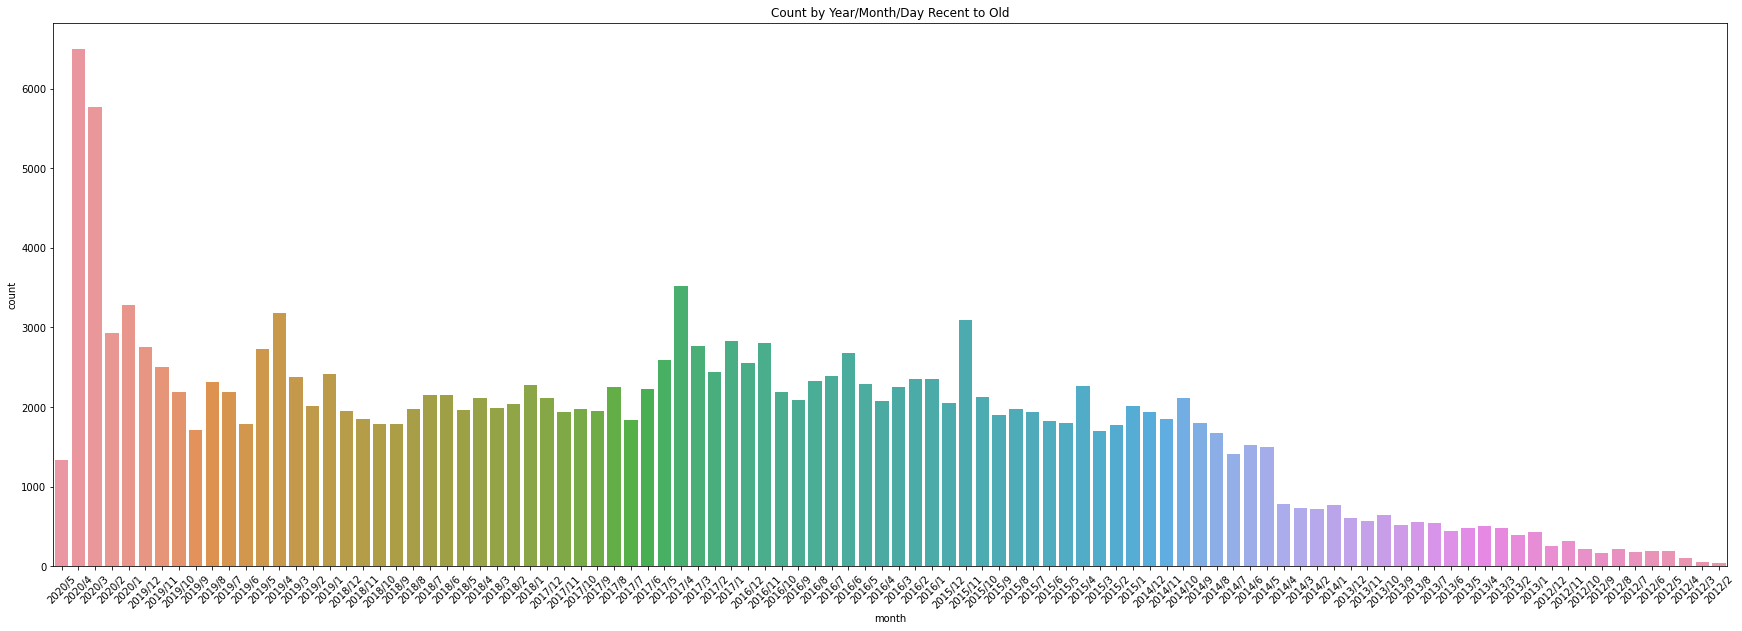

2020/4     6501
2020/3     5774
2017/4     3518
2020/1     3286
2019/4     3176
2015/11    3090
2020/2     2936
2017/1     2833
2016/11    2810
2017/3     2772
2019/12    2750
2019/5     2724
2016/6     2678
2017/5     2589
2016/12    2549
2019/11    2498
2017/2     2441
2019/1     2419
2016/7     2394
2019/3     2378
2016/2     2350
2016/1     2348
2016/8     2328
2019/8     2310
2016/5     2284
2018/1     2280
2015/4     2263
2016/3     2255
2017/8     2248
2017/6     2232
2019/7     2193
2019/10    2190
2016/10    2190
2018/6     2157
2018/7     2151
2015/10    2130
2017/12    2118
2014/10    2118
2018/4     2113
2016/9     2090
2016/4     2072
2015/12    2056
2018/2     2039
2019/2     2020
2015/1     2017
2018/3     1994
2017/10    1981
2018/8     1972
2015/8     1972
2018/5     1964
2018/12    1947
2017/9     1947
2017/11    1944
2015/7     1934
2014/12    1934
2015/9     1903
2018/11    1847
2014/11    1847
2017/7     1839
2015/6     1824
2015/5     1802
2014/9     1801
2019/6  

In [31]:
countplot(cleaned, 'month')

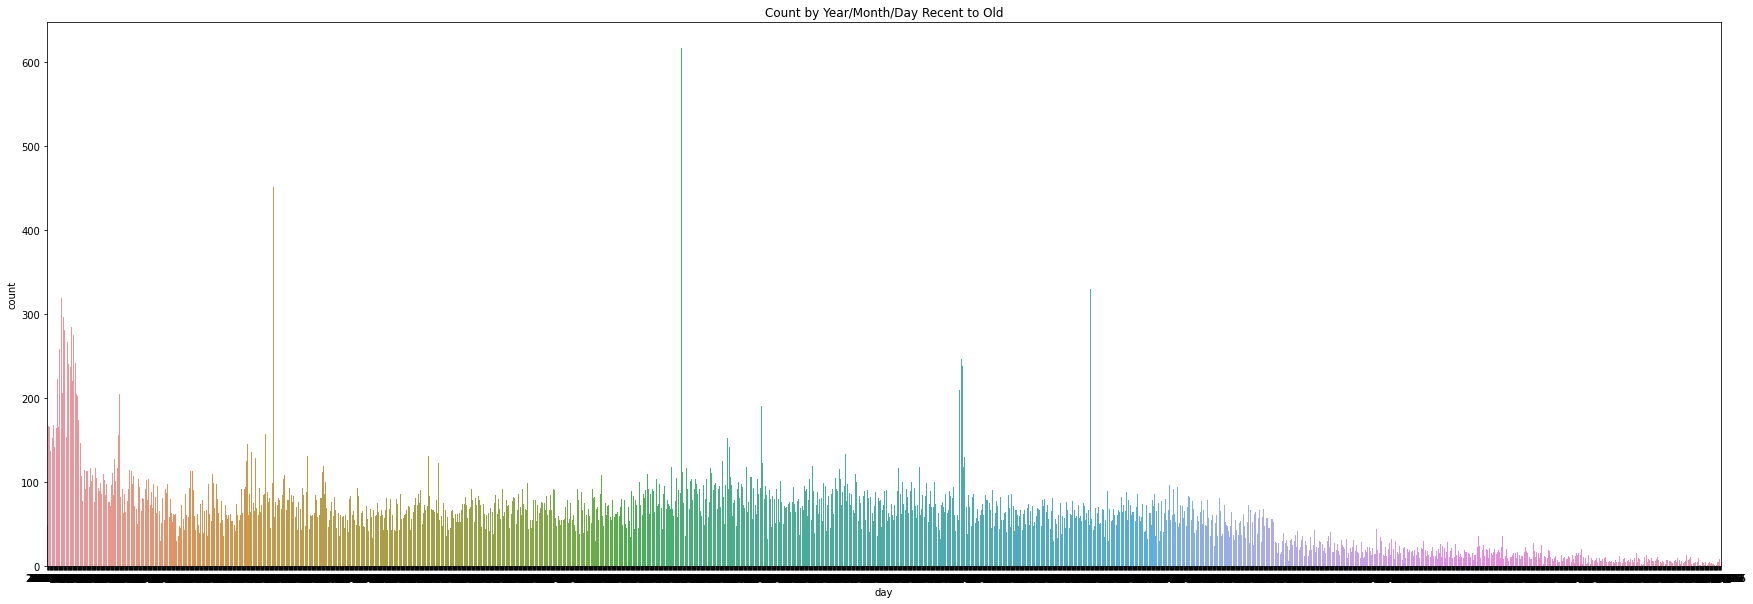

2017/4/2     617
2017/4/1     581
2019/4/2     524
2019/4/1     452
2020/4/2     348
            ... 
2012/2/27      1
2012/7/17      1
2012/2/22      1
2012/2/24      1
2012/3/25      1
Name: day, Length: 2991, dtype: int64

In [32]:
countplot(cleaned, 'day')

> What happened on April 1st, 2nd?

## 5.3. Wordcloud Text Analysis<a id="5.3"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [33]:
def wordcloud(dataset, min_freq=1):
    bow = list()
    for title in tqdm(dataset['title_cleaned']):
        bow += word_tokenize(title)
    
    word_freq = dict()
    counter = Counter(bow)
    for word, freq in counter.items():
        if freq >= min_freq:
            word_freq[word] = freq
    
    reddit_mask = np.array(Image.open('./data/static/reddit icon.png'))    
    
    wc = WordCloud(width=800, height=800, background_color='white', mask=reddit_mask)
    wc = wc.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    return counter, word_freq

100%|██████████| 178312/178312 [00:18<00:00, 9751.92it/s] 


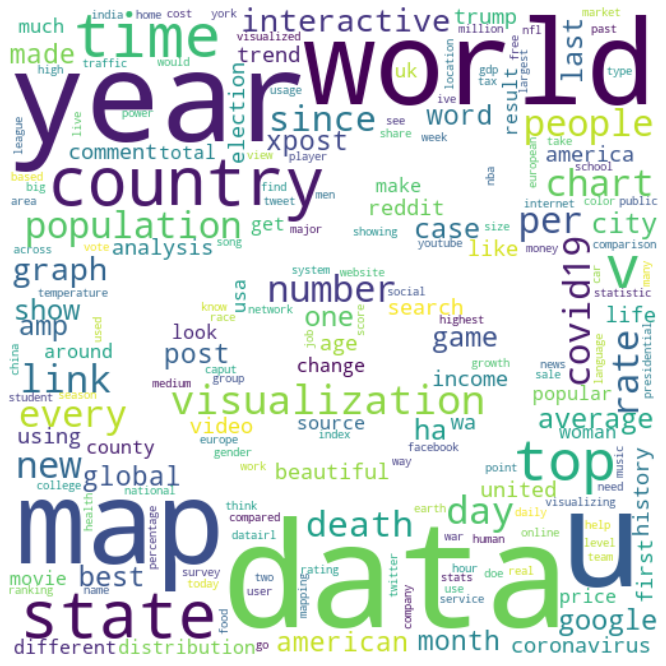

In [34]:
counter, word_freq = wordcloud(cleaned)

In [35]:
def wordcloud_by_date(dataset, year=None, month=None, day=None):
    dataset_cp = dataset.copy()
    
    if year:
        dataset_cp = dataset_cp[dataset_cp['year'] == year]
    if month:
        dataset_cp = dataset_cp[dataset_cp['month'] == month]
    if day:
        dataset_cp = dataset_cp[dataset_cp['day'] == day]
    
    return wordcloud(dataset_cp)

100%|██████████| 19835/19835 [00:02<00:00, 9478.39it/s]


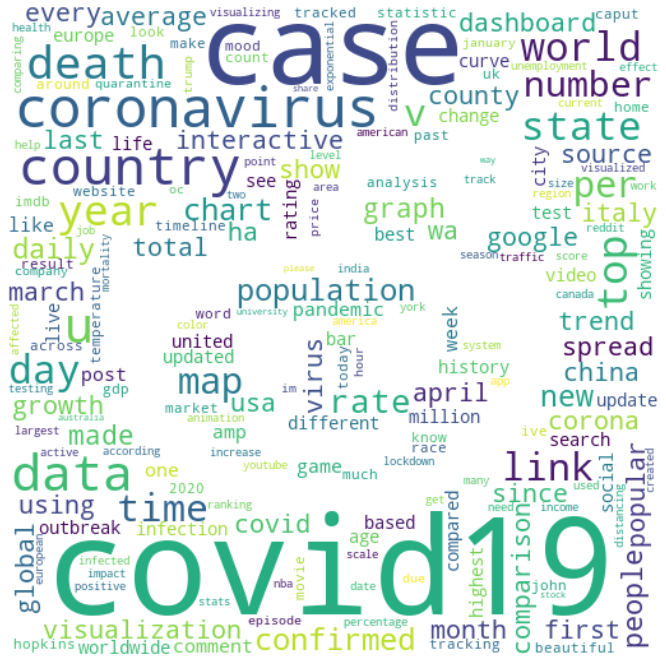

In [36]:
counter_2020, word_freq_2020 = wordcloud_by_date(cleaned, year=2020)

100%|██████████| 581/581 [00:00<00:00, 11069.68it/s]


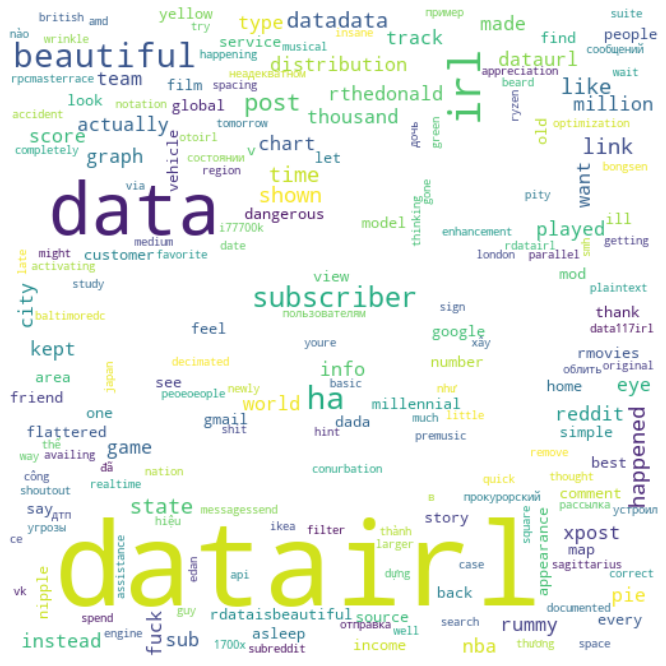

In [37]:
counter_20170401, word_freq_20170401 = wordcloud_by_date(cleaned, year=2017, month=4, day=1)

100%|██████████| 617/617 [00:00<00:00, 11312.17it/s]


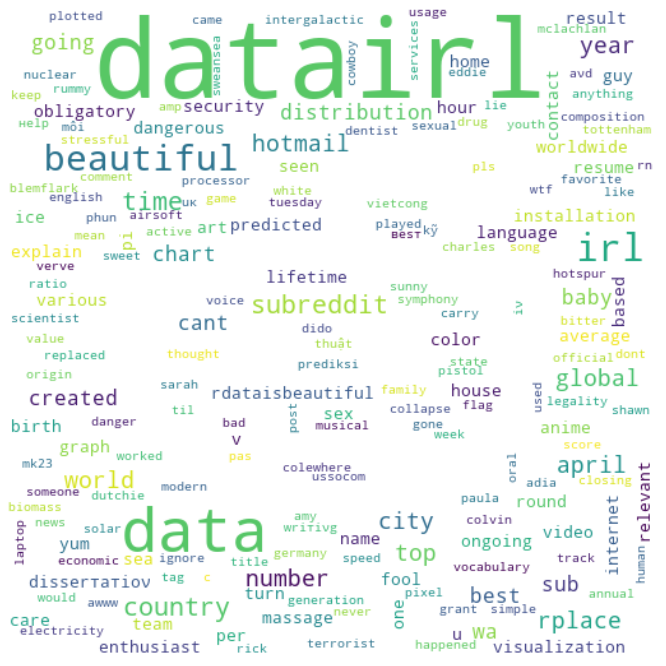

In [38]:
counter_20170402, word_freq_20170402 = wordcloud_by_date(cleaned, year=2017, month=4, day=2)

100%|██████████| 3518/3518 [00:00<00:00, 10508.21it/s]


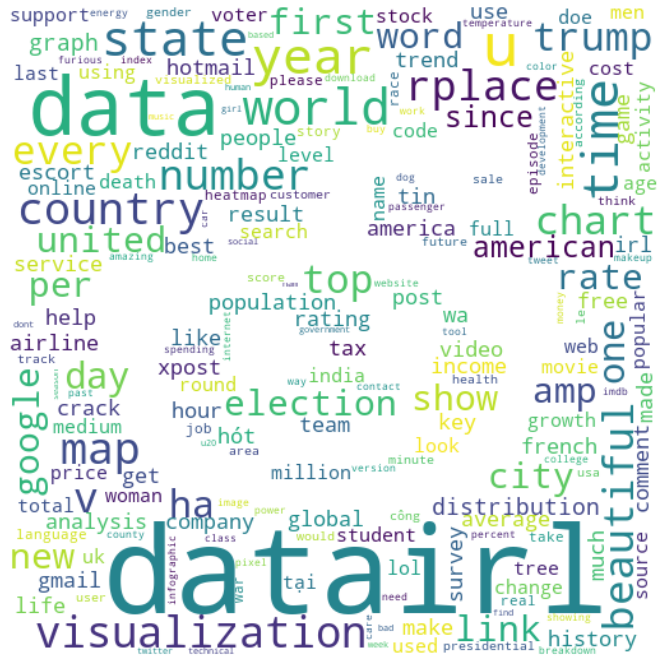

In [39]:
counter_201704, word_freq_201704 = wordcloud_by_date(cleaned, year=2017, month=4)

100%|██████████| 21043/21043 [00:02<00:00, 10119.93it/s]


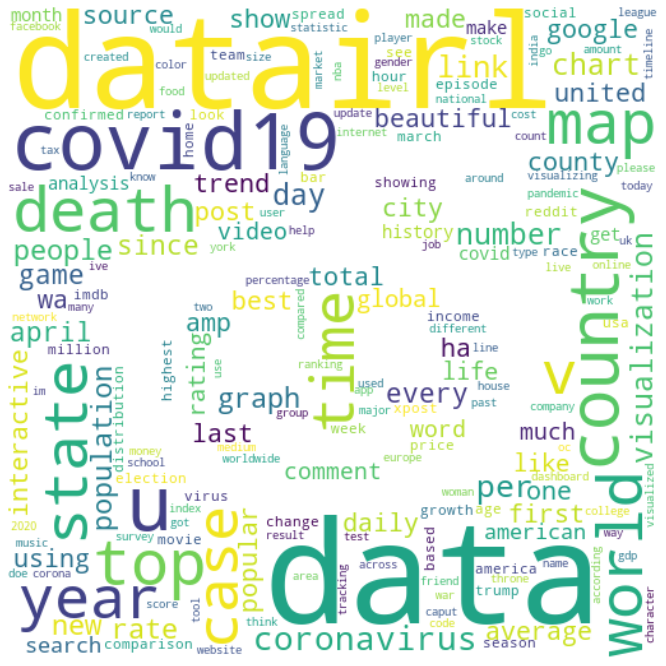

In [40]:
counter_04, word_freq_04 = wordcloud_by_date(cleaned, month=4)

> What happened on April 1st, 2nd? -> DATAIRL(DATA In Real Life)

> coronavirus is overwhelming

# 6. Word Embedding<a id="6"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 6.1. Count Vectorizer<a id="6.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [41]:
def count_vectorize(dataset):
    
    vectorizer = CountVectorizer()
    
    documents = list()
    for title in tqdm(dataset['title_cleaned']):
        documents.append(title)
    document_vector = vectorizer.fit_transform(documents)
    return vectorizer, document_vector

In [42]:
cv, cv_encoded = count_vectorize(cleaned)

100%|██████████| 178312/178312 [00:00<00:00, 1800390.30it/s]


In [43]:
cv_encoded.shape

(178312, 68999)

In [44]:
for i, j in zip(cv_encoded.nonzero()[0][:30], cv_encoded.nonzero()[1][:30]):
    print('({:4}, {:8}({:15})) -> {}'.format(i, j, cv.get_feature_names()[j], cv_encoded[i, j]))

(   0,     1861(3d             )) -> 1
(   0,    58701(visualization  )) -> 1
(   0,    13453(covid19        )) -> 1
(   0,    19403(evolution      )) -> 1
(   0,    11464(city           )) -> 1
(   0,     8812(brazil         )) -> 1
(   0,    31470(link           )) -> 1
(   0,    12245(comment        )) -> 1
(   1,    25873(household      )) -> 1
(   1,    38350(oil            )) -> 1
(   1,    12826(consumption    )) -> 1
(   1,    42427(price          )) -> 1
(   1,    49878(since          )) -> 1
(   1,    28993(july           )) -> 1
(   2,    41729(popular        )) -> 1
(   2,    51549(state          )) -> 1
(   2,    40376(people         )) -> 1
(   2,    30904(leaving        )) -> 1
(   2,    36696(new            )) -> 1
(   2,    61218(york           )) -> 1
(   3,    49139(several        )) -> 1
(   3,     4716(animated       )) -> 1
(   3,    11664(climate        )) -> 1
(   3,    32954(map            )) -> 1
(   3,    49597(showing        )) -> 1
(   3,    61057(year     

## 6.2. TF-IDF Vectorizer<a id="6.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [45]:
def tfidf_vectorize(dataset):
    vectorizer = TfidfVectorizer()
    
    documents = list()
    for title in tqdm(dataset['title_cleaned']):
        documents.append(title)
    document_vector = vectorizer.fit_transform(documents)
    return vectorizer, document_vector

In [46]:
tfidf, tfidf_encoded = tfidf_vectorize(cleaned)

100%|██████████| 178312/178312 [00:00<00:00, 1742077.40it/s]


In [47]:
tfidf_encoded.shape

(178312, 68999)

In [48]:
for i, j in zip(tfidf_encoded.nonzero()[0][:30], tfidf_encoded.nonzero()[1][:30]):
    print('({:4}, {:8}({:15})) -> {}'.format(i, j, tfidf.get_feature_names()[j], tfidf_encoded[i, j]))

(   0,    12245(comment        )) -> 0.33041090208522567
(   0,    31470(link           )) -> 0.28609722732804815
(   0,     8812(brazil         )) -> 0.4704179669342879
(   0,    11464(city           )) -> 0.3124499478076306
(   0,    19403(evolution      )) -> 0.39588404602072463
(   0,    13453(covid19        )) -> 0.29906388498757797
(   0,    58701(visualization  )) -> 0.2769272983347363
(   0,     1861(3d             )) -> 0.408909360418996
(   1,    28993(july           )) -> 0.47748615504104863
(   1,    49878(since          )) -> 0.3137351923702232
(   1,    42427(price          )) -> 0.35666901297399667
(   1,    12826(consumption    )) -> 0.40902725873789925
(   1,    38350(oil            )) -> 0.43047561139021334
(   1,    25873(household      )) -> 0.44017254072042167
(   2,    61218(york           )) -> 0.43510505783869863
(   2,    36696(new            )) -> 0.3347744857356284
(   2,    30904(leaving        )) -> 0.5918735122792322
(   2,    40376(people         )) -> 0.

# 7. Data Modeling<a id="7"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 7.1. Dimension Reduction<a id="7.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [49]:
oc = cleaned[cleaned['original_content'] == 1]
noc = cleaned[cleaned['original_content'] == 0]

In [50]:
def scatter(data, x):
    oc = data[data['original_content'] == 1]
    noc = data[data['original_content'] == 0]

    plt.figure(figsize=(10, 10))
    plt.scatter(x[oc.index, 0], x[oc.index, 1], color='red', label='Original Content')
    plt.scatter(x[noc.index, 0], x[noc.index, 1], color='blue', label='Not Original Content')
    plt.legend()
    plt.title('Sample 2-Dimension Features')
    plt.show()

**Truncated SVD(for Sparse Data)**

In [87]:
def svd(encoded, dimension=50):
    svd = TruncatedSVD(n_components=dimension, n_iter=10, random_state=2020)
    reduced = svd.fit_transform(encoded)
    return svd, reduced

In [88]:
svd50, svd50_reduced = svd(tfidf_encoded)

In [89]:
svd50_reduced.shape

(178312, 50)

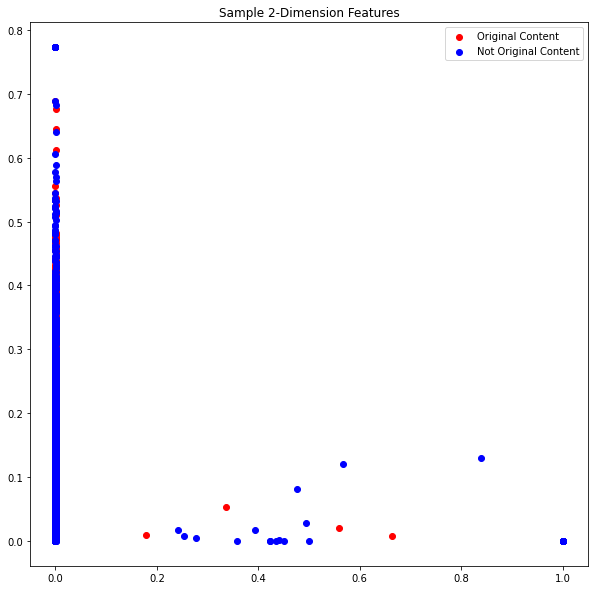

In [90]:
scatter(cleaned, svd50_reduced)

**T-SNE**<br>
Tooooooo Many Times needed

In [55]:
def tsne(encoded, dimension=2):
    tsne = TSNE(n_components=dimension, verbose=5, random_state=2020, n_jobs=4)
    reduced = tsne.fit_transform(encoded)
    return tsne, reduced

In [56]:
# tsne, tsne_reduced = tsne(svd_reduced)

In [57]:
# tsne_reduced.shape

In [58]:
# scatter(cleaned, tsne_reduced)

## 7.2. Classification<a id="7.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

Is it possible to discriminate Original Content vs Non Original Content by title? -> About 60% Accuracy, may need model tuning

In [59]:
X = svd_reduced
Y = np.array(cleaned['original_content'])

In [60]:
X.shape

(178312, 50)

In [61]:
Y.shape

(178312,)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y
)

In [63]:
x_train.shape

(142649, 50)

In [64]:
x_test.shape

(35663, 50)

In [65]:
def gradient_boosting_model(x_train, y_train, x_test, y_test):
    model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, random_state=2020, verbose=1)
    scores = cross_validate(model, x_train, y_train, scoring='accuracy', cv=2, return_train_score=True, verbose=1)

    print('Validation Accuracies: {}'.format(scores['test_score']))
    
    model.fit(x_train, y_train)
    acc = accuracy_score(model.predict(x_test), y_test)
    print('Test Accuracy: {}'.format(acc))
    
    return model, scores

In [66]:
gradient_boosting_model(x_train, y_train, x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1           1.3801            2.08m
         2           1.3790            2.05m
         3           1.3778            2.01m
         4           1.3767            1.98m
         5           1.3757            1.94m
         6           1.3746            1.90m
         7           1.3736            1.86m
         8           1.3725            1.84m
         9           1.3715            1.81m
        10           1.3706            1.79m
        20           1.3617            1.55m
        30           1.3542            1.34m
        40           1.3478            1.15m
        50           1.3423           57.42s
        60           1.3375           45.79s
        70           1.3331           34.24s
        80           1.3293           22.79s
        90           1.3259           11.39s
       100           1.3226            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3801            1.91m
        

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.8min finished


Validation Accuracies: [0.59329828 0.59168022]
      Iter       Train Loss   Remaining Time 
         1           1.3801            4.06m
         2           1.3790            4.00m
         3           1.3779            3.97m
         4           1.3768            3.92m
         5           1.3758            3.95m
         6           1.3747            3.94m
         7           1.3737            3.88m
         8           1.3727            3.82m
         9           1.3717            3.79m
        10           1.3708            3.74m
        20           1.3621            3.39m
        30           1.3546            2.99m
        40           1.3483            2.55m
        50           1.3428            2.11m
        60           1.3381            1.68m
        70           1.3340            1.25m
        80           1.3303           50.23s
        90           1.3271           25.03s
       100           1.3239            0.00s
Test Accuracy: 0.5924908168129434


(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.01, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=2020, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=1,
                            warm_start=False),
 {'fit_time': array([113.78875422, 114.33385396]),
  'score_time': array([0.14815807, 0.14701796]),
  'test_score': array([0.59329828, 0.59168022]),
  'train_score': array([0.59569009, 0.59374693])})

## 7.3. Topic Modeling<a id="7.3"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [67]:
def lda(encoded, n_topic=10):
    lda = LatentDirichletAllocation(n_components=n_topic, verbose=1, random_state=2020)
    lda.fit(encoded)
    return lda

In [68]:
model = lda(tfidf_encoded, n_topic=12)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [69]:
for idx, topic in enumerate(model.components_):
    words = [tfidf.get_feature_names()[topic_id] for topic_id in topic.argsort()[::-1][:10]]
    print('Topic {:2d} -> {}'.format(idx, words))

Topic  0 -> ['link', 'data', 'beautiful', 'world', 'visualization', 'map', 'debt', 'air', 'dog', 'wealth']
Topic  1 -> ['data', 'doe', 'visualization', 'spending', 'map', 'country', 'military', 'make', 'year', 'know']
Topic  2 -> ['social', 'country', 'shooting', 'gdp', 'medium', 'reddit', 'mass', 'wage', 'sea', 'rate']
Topic  3 -> ['world', 'year', 'language', 'every', 'tax', 'time', '裕美', 'ルミィヤンツェヴァのスライドショー', 'company', 'day']
Topic  4 -> ['word', 'trump', 'movie', 'presidential', 'election', 'data', 'time', 'year', 'candidate', 'visualization']
Topic  5 -> ['state', 'population', 'united', 'life', 'rate', 'age', 'country', 'map', 'expectancy', 'county']
Topic  6 -> ['datairl', 'data', 'emission', 'co2', 'sleep', 'year', 'search', 'google', 'job', 'market']
Topic  7 -> ['world', 'team', 'map', 'nfl', 'nba', 'player', 'football', 'cup', 'year', 'top']
Topic  8 -> ['game', 'top', 'rating', 'music', 'brand', 'imdb', 'episode', 'throne', 'popular', 'song']
Topic  9 -> ['new', 'gun', 'yor

In [77]:
topic_df = cleaned.copy()
length = cleaned['title_cleaned'].shape[0]
for idx, title in tqdm(enumerate(cleaned['title_cleaned'])):
    encoded = tfidf_encoded[idx]
    topics = model.transform(encoded)
    topic = topics.argsort()[0][::-1][0]

    topic_df.loc[idx, 'topic'] = topic
    topic_df.loc[idx, 'topic_value'] = topics[0][topic]

    if idx % 30000 == 0 or idx == length - 1:
        print('Topic {:2d}({:.6f}) {:}'.format(topic, topics[0][topic], title))
topic_df

55it [00:00, 266.97it/s]

Topic 11(0.757498) 3d visualization covid19 evolution city brazil link comment


30074it [01:06, 444.52it/s]

Topic  4(0.495869) looking back month worth coding source github


60083it [02:12, 452.02it/s]

Topic  6(0.541667) sweater


90050it [03:19, 450.08it/s]

Topic  3(0.595712) prevalence heart disease gender american heart association


120091it [04:25, 454.67it/s]

Topic  7(0.712407) gpa every course university illinois


150072it [05:31, 454.05it/s]

Topic  8(0.693134) frequency drug reference rap


178312it [06:34, 452.26it/s]

Topic 10(0.723966) map showing geographical distribution lactose intolerance


,id,title,score,author,created_utc,full_link,num_comments,over_18,year,month,day,hour,minute,second,original_content,title_cleaned,topic,topic_value
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,5,6,11,1,3d visualization covid19 evolution city brazil...,11.0,0.757498
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,5,1,43,1,household oil consumption price since july,11.0,0.732544
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,5,0,45,1,popular state people leaving new york,9.0,0.390042
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,4,57,40,1,several animated climate map showing year wort...,3.0,0.754466
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2020,5,9,4,52,3,0,web scraping python,4.0,0.662318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2012,2,15,14,14,9,0,infosthetics seems like belongs,5.0,0.415847
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2012,2,15,14,2,40,0,time lapse every nuclear detonation,10.0,0.491491
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,0,2012,2,15,13,22,57,0,wavii,2.0,0.541667
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,2012,2,15,9,20,3,1,interactive representation pres obamas budget ...,3.0,0.387185


In [82]:
topic_df['topic'] = topic_df['topic'].astype(int)

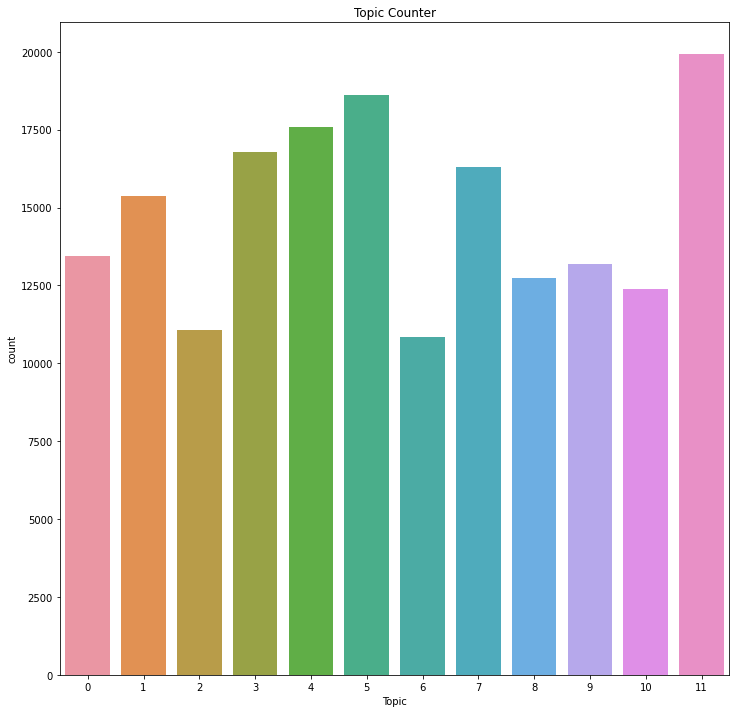

In [84]:
plt.figure(figsize=(12, 12))
sns.countplot(topic_df['topic'])
plt.xlabel('Topic')
plt.title('Topic Counter')
plt.show()

In [111]:
svd2, svd2_reduced = svd(tfidf_encoded, dimension=2)

In [112]:
svd2_reduced.shape

(178312, 2)

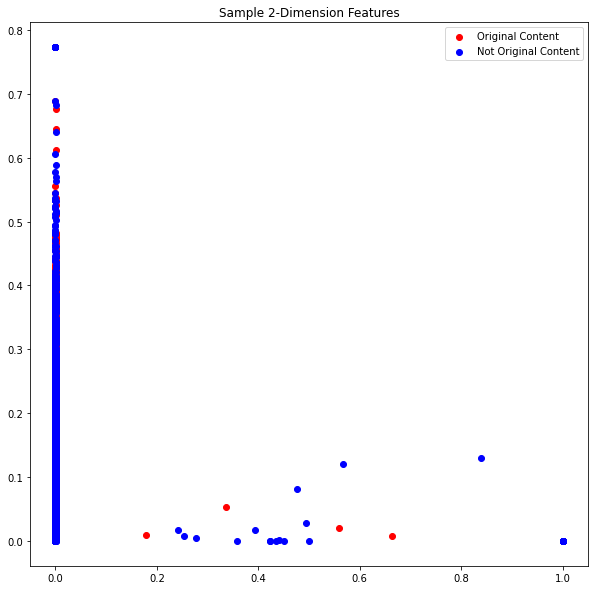

In [113]:
scatter(cleaned, svd2_reduced)

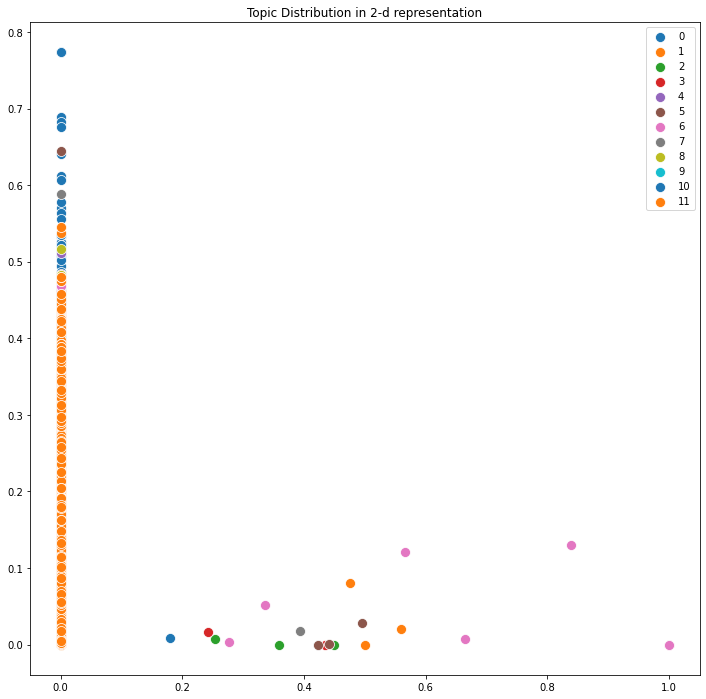

In [118]:
plt.figure(figsize=(12, 12))
for topic in sorted(topic_df['topic'].unique()):
    index = topic_df[topic_df['topic'] == topic].index
    sns.scatterplot(x=svd2_reduced[index, 0], y=svd2_reduced[index, 1], label=str(topic), s=100)
plt.legend()
plt.title('Topic Distribution in 2-d representation')
plt.show()